In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def rgb_to_hex(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

def get_exact_color_counts(image_path, top_n=20):
    # 1. Cargar imagen y convertir a RGB
    img = cv2.imread(image_path)
    if img is None:
        print("Error: No se pudo cargar la imagen.")
        return
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # 2. Aplanar la imagen a una lista de pixeles (R, G, B)
    pixels = img.reshape(-1, 3)
    
    # Convertir cada píxel (array) a una tupla para que sea "hashable" y se pueda contar
    pixels_tuple = [tuple(p) for p in pixels]
    
    # 3. Contar ocurrencias de cada color único
    counts = Counter(pixels_tuple)
    total_pixels = len(pixels)
    
    # 4. Ordenar por frecuencia de mayor a menor
    sorted_counts = counts.most_common()
    
    print(f"Colores únicos encontrados: {len(sorted_counts)}")
    print(f"{'HEX':<10} | {'Píxeles':<10} | {'Porcentaje':<10}")
    print("-" * 35)
    
    # Preparar datos para la visualización
    display_colors = []
    for i, (color, count) in enumerate(sorted_counts):
        hex_code = rgb_to_hex(color)
        percentage = (count / total_pixels) * 100
        
        # Solo imprimimos los mejores N en consola para no saturar
        if i < top_n:
            print(f"{hex_code:<10} | {count:<10} | {percentage:.4f}%")
        
        display_colors.append({
            'rgb': color,
            'percentage': percentage
        })

    # 5. Crear imagen con cuadraditos (Top N colores)
    # Mostraremos los top_n colores en una cuadrícula
    rows = 2
    cols = top_n // rows
    square_size = 100
    
    # Crear un lienzo blanco para los cuadraditos
    canvas = np.ones((rows * square_size, cols * square_size, 3), dtype="uint8") * 255
    
    for i in range(top_n):
        if i >= len(display_colors): break
        r = i // cols
        c = i % cols
        color = display_colors[i]['rgb']
        
        # Dibujar el cuadrado del color
        cv2.rectangle(canvas, (c * square_size, r * square_size), 
                      ((c + 1) * square_size, (r + 1) * square_size), 
                      [int(x) for x in color], -1)

    plt.figure(figsize=(12, 6))
    plt.imshow(canvas)
    plt.title(f"Top {top_n} colores más usados (Exactos)")
    plt.axis("off")
    plt.show()

# Ejecutar (puedes cambiar 20 por el número de cuadraditos que quieras ver)
get_exact_color_counts('1.jpeg', top_n=20)

Error: No se pudo cargar la imagen.


[ WARN:0@0.447] global loadsave.cpp:278 findDecoder imread_('1.jpeg'): can't open/read file: check file path/integrity


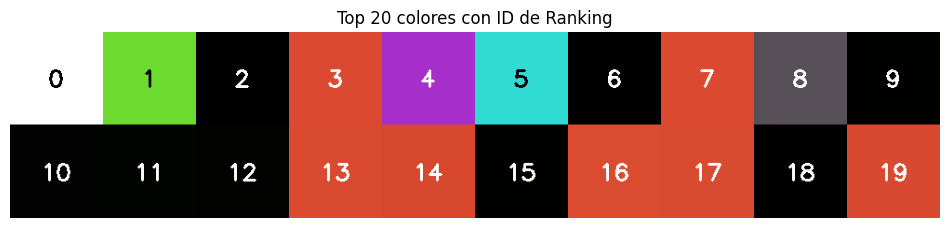

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

def rgb_to_hex(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

def get_text_color(rgb):
    # Fórmula de luminancia: 0.299*R + 0.587*G + 0.114*B
    luminance = 0.299 * rgb[0] + 0.587 * rgb[1] + 0.114 * rgb[2]
    return (255, 255, 255) if luminance < 128 else (0, 0, 0)

def get_exact_color_counts(image_path, top_n=20):
    # 1. Cargar imagen y convertir a RGB
    img = cv2.imread(image_path)
    if img is None:
        print("Error: No se pudo cargar la imagen.")
        return None
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    pixels = img.reshape(-1, 3)
    pixels_tuple = [tuple(p) for p in pixels]
    
    # 2. Contar ocurrencias
    counts = Counter(pixels_tuple)
    total_pixels = len(pixels)
    sorted_counts = counts.most_common()
    
    # 3. Preparar datos para el DataFrame y la visualización
    data_list = []
    display_colors = []
    
    for i, (color, count) in enumerate(sorted_counts):
        if i >= top_n: break
        
        hex_code = rgb_to_hex(color)
        percentage = (count / total_pixels) * 100
        
        # Guardar para el DataFrame
        data_list.append({
            'ID': i,
            'HEX': hex_code,
            'Porcentaje': percentage,
            'RGB': color
        })
        
        display_colors.append({'rgb': color, 'percentage': percentage})

    # Crear el DataFrame
    df = pd.DataFrame(data_list)

    # 4. Crear imagen con cuadraditos y números
    rows = 2
    cols = top_n // rows
    square_size = 100
    canvas = np.ones((rows * square_size, cols * square_size, 3), dtype="uint8") * 255
    
    for i in range(top_n):
        if i >= len(display_colors): break
        r = i // cols
        c = i % cols
        color = display_colors[i]['rgb']
        
        x1, y1 = c * square_size, r * square_size
        x2, y2 = (c + 1) * square_size, (r + 1) * square_size
        
        cv2.rectangle(canvas, (x1, y1), (x2, y2), [int(x) for x in color], -1)
        
        txt_color = get_text_color(color)
        text = str(i)
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.8
        thickness = 2
        
        text_size = cv2.getTextSize(text, font, font_scale, thickness)[0]
        text_x = x1 + (square_size - text_size[0]) // 2
        text_y = y1 + (square_size + text_size[1]) // 2
        
        cv2.putText(canvas, text, (text_x, text_y), font, font_scale, txt_color, thickness)

    # Mostrar la imagen
    plt.figure(figsize=(12, 6))
    plt.imshow(canvas)
    plt.title(f"Top {top_n} colores con ID de Ranking")
    plt.axis("off")
    plt.show()

    return df

# --- Ejecución ---
# Ahora la función devuelve el DataFrame que puedes guardar en una variable
df_colores = get_exact_color_counts('2a.png', top_n=20)


In [ ]:
similar_colors = [
    [1], # Verde
    [2, 6, 9, 10, 11, 12, 15, 18], # Negro
    [3, 7, 13, 14, 16, 17, 19], # Rojo
    [4], # Violeta
    [5] # Celeste
]



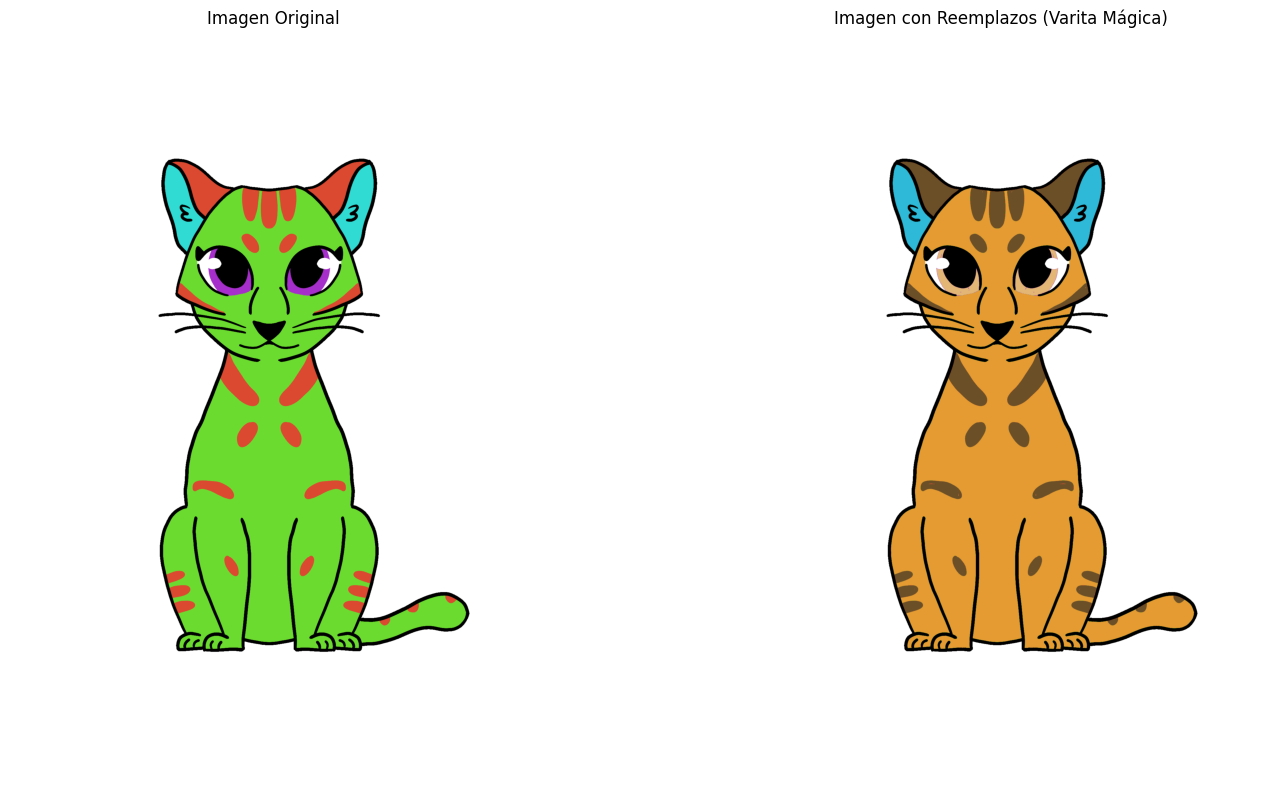

Comparación imagen anterior y nueva finalizada.


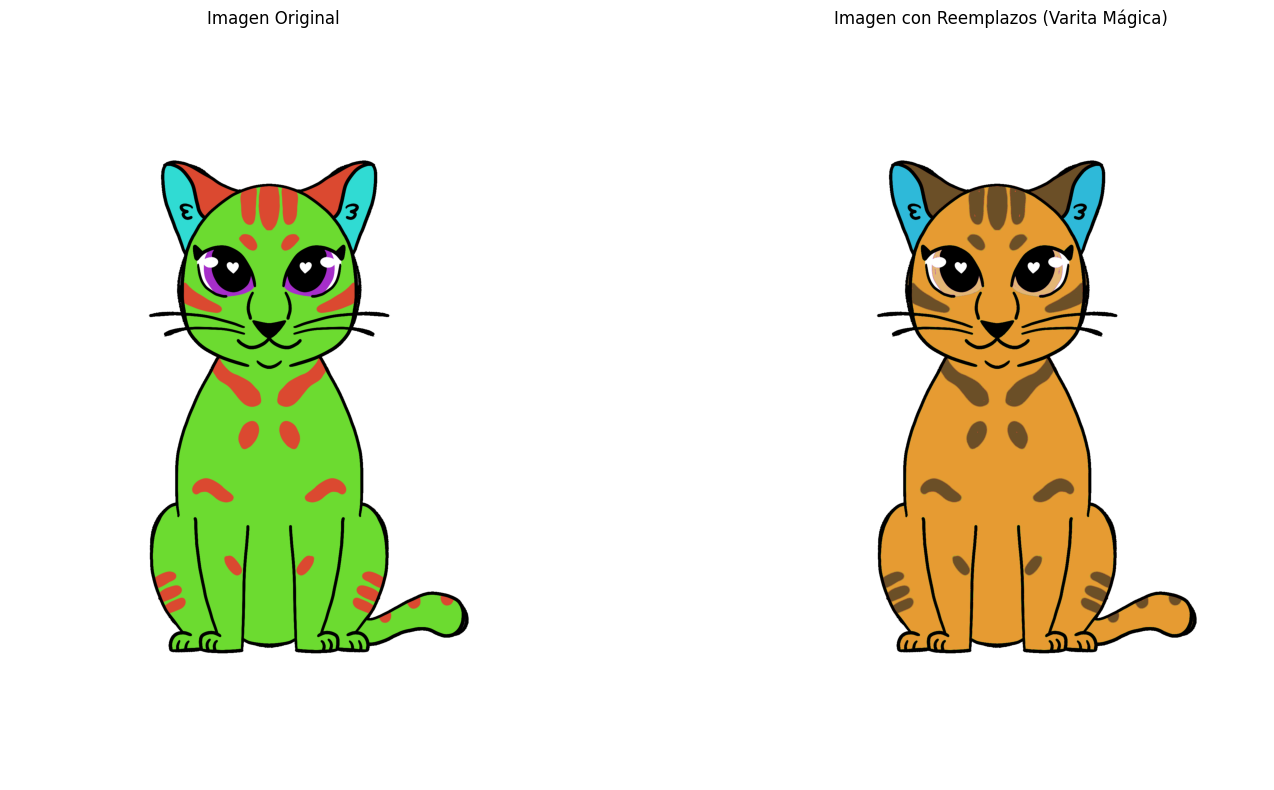

Comparación imagen anterior y nueva finalizada.


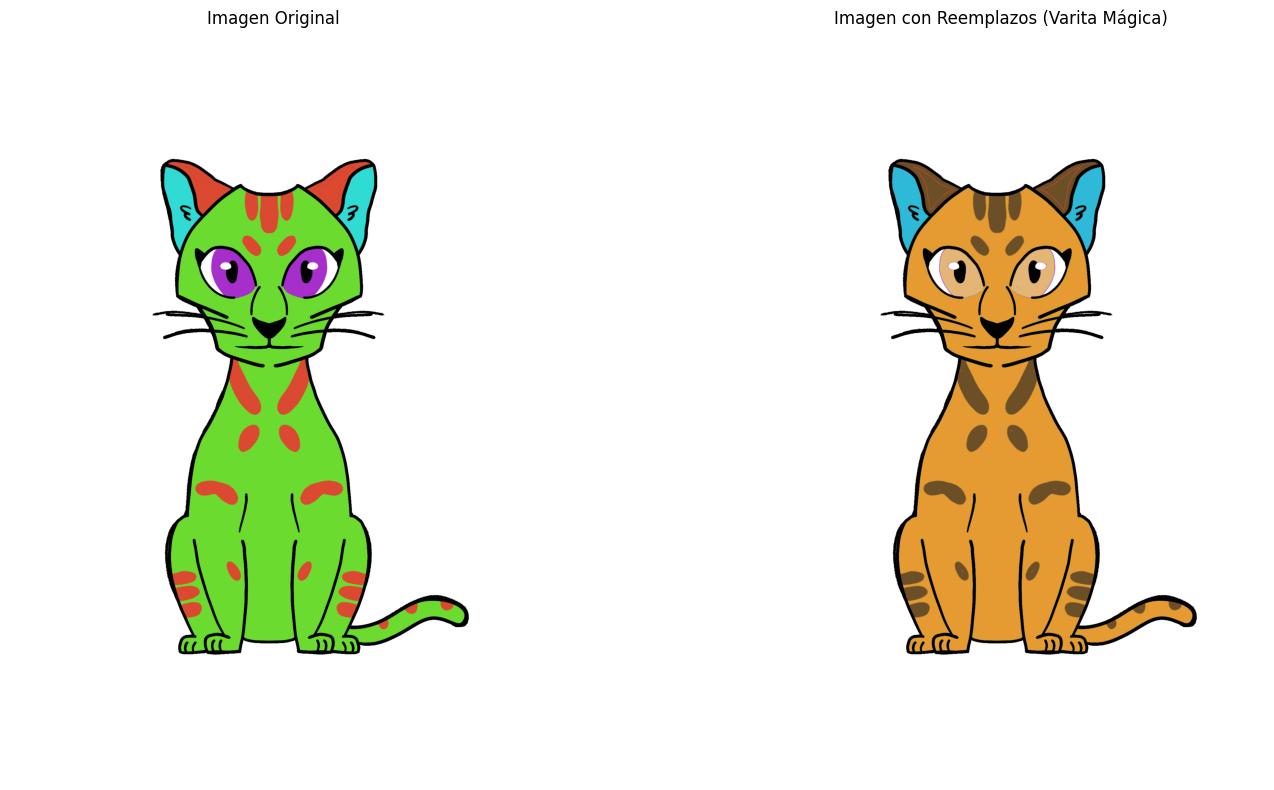

Comparación imagen anterior y nueva finalizada.


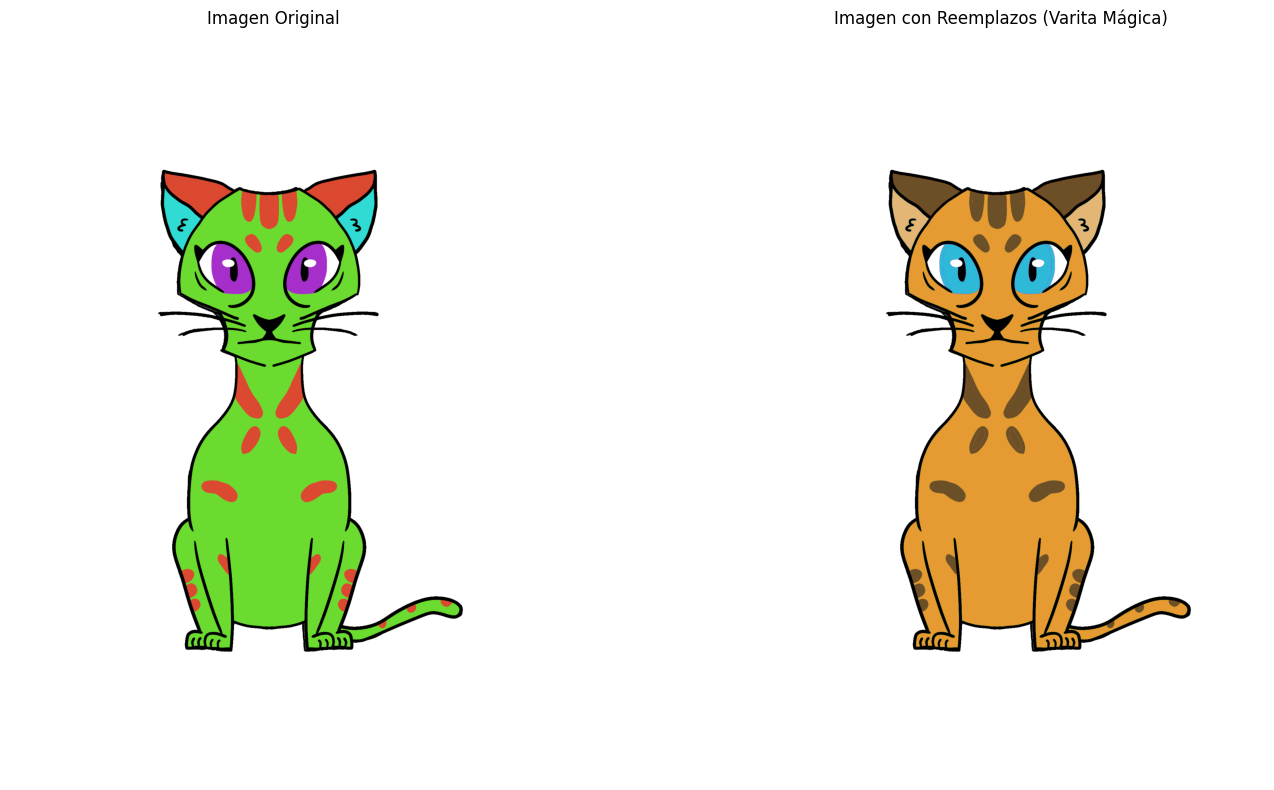

Comparación imagen anterior y nueva finalizada.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def hex_to_rgb(hex_code):
    hex_code = hex_code.lstrip('#')
    return tuple(int(hex_code[i:i+2], 16) for i in (0, 2, 4))

def replace_func(img_name, similar_colors, replace_dict):
    # 1. Cargar imagen original
    img = cv2.imread(img_name)
    if img is None:
        print("Error al cargar la imagen.")
        return
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # 2. Obtener los colores únicos y su ranking (ID)
    pixels = img_rgb.reshape(-1, 3)
    pixels_tuple = [tuple(p) for p in pixels]
    counts = Counter(pixels_tuple)
    sorted_counts = counts.most_common() # Lista de ((R,G,B), count)
    
    # 3. Crear el mapa de transformación
    # Por defecto, cada color se queda como está
    # Usamos un diccionario de tuplas RGB para el mapeo
    color_map = {color[0]: np.array(color[0], dtype="uint8") for color in sorted_counts}
    
    # 4. Aplicar la lógica de grupos y reemplazos
    for group_idx, group_list in enumerate(similar_colors):
        # Si este grupo tiene un color de reemplazo definido
        if group_idx in replace_dict:
            new_color_hex = replace_dict[group_idx]
            new_color_rgb = np.array(hex_to_rgb(new_color_hex), dtype="uint8")
            
            # Para cada ID en esa lista de similares, actualizamos el mapa
            for color_id in group_list:
                if color_id < len(sorted_counts):
                    original_rgb = sorted_counts[color_id][0]
                    color_map[original_rgb] = new_color_rgb
    
    # 5. Reconstruir la imagen
    # Creamos una imagen vacía y la rellenamos usando máscaras de NumPy
    new_img = np.copy(img_rgb)
    
    # Optimizamos el reemplazo: solo iteramos sobre los colores que cambiaron
    for original_rgb, target_rgb in color_map.items():
        # Comparamos si el color de destino es diferente al original
        if not np.array_equal(original_rgb, target_rgb):
            # Encontrar todos los píxeles con el color original y cambiarlos
            mask = np.all(img_rgb == original_rgb, axis=-1)
            new_img[mask] = target_rgb

    # 6. Mostrar comparación
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    axes[0].imshow(img_rgb)
    axes[0].set_title("Imagen Original")
    axes[0].axis("off")
    
    axes[1].imshow(new_img)
    axes[1].set_title("Imagen con Reemplazos (Varita Mágica)")
    axes[1].axis("off")
    
    plt.tight_layout()
    plt.show()
    
    print("Comparación imagen anterior y nueva finalizada.")
    return new_img

# --- CONFIGURACIÓN DEL USUARIO ---
import os

replace_dicts = [{0: "#e69b32",
                2: "#6b4f27",
                3: "#2eb9d9",
                4: "#e3b676"}]

replace_dict = replace_dicts[0]

or_dir = "./cat_base/"
for img_name in os.listdir("./cat_base/"):
    img_dir = or_dir + img_name
    imagen_procesada = replace_func(img_dir, similar_colors, replace_dict)